In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Embedding, Input, Dense, Reshape, merge, Concatenate, Activation
from keras.activations import sigmoid
from keras.backend import squeeze
from scipy import spatial

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
word = Input((1,))
pos = Input((1,))
neg = Input((10,))

In [3]:
emb_1 = Embedding(100, 10, name='emb_1')
emb_2 = Embedding(100,10, name='emb_2')

In [4]:
vec_w = emb_1(word)
vec_p = emb_2(pos)
vec_n = emb_2(neg)

In [5]:
pos_ = merge.dot([vec_w,vec_p], axes=2)
neg_ = merge.dot([vec_w,vec_n], axes=2)

In [6]:
concat = Concatenate()([pos_,neg_])
concat = Reshape((11,))(concat)

In [7]:
output = Activation('sigmoid')(concat)

In [8]:
model = Model(input=[word, pos, neg], output=output)
model.compile(loss='binary_crossentropy', optimizer='rmsprop')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("ac...)`
  """Entry point for launching an IPython kernel.


## Training 0 to be in context of 1

In [9]:
arr_1 = np.zeros((1,1))
arr_2 = np.zeros((1,1))
arr_3 = np.random.randint(low=5,high=100, size=(1,10))
out = np.zeros((1,11))
out[0,0] = 1

arr_2[0,0] = 1

In [10]:
loss = []
for i in range(1000):
    loss.append(model.train_on_batch(x=[arr_1,arr_2,arr_3],y=out))

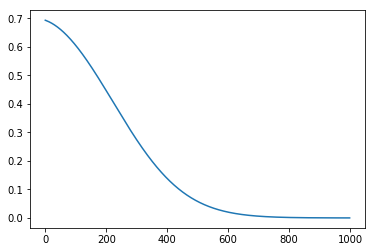

In [11]:
plt.plot(loss)

## Training 2 to be in context of 1

In [12]:
arr_1 = np.zeros((1,1))
arr_2 = np.zeros((1,1))
arr_3 = np.random.randint(low=5,high=100, size=(1,10))
out = np.zeros((1,11))
out[0,0] = 1

arr_1[0,0] = 2
arr_2[0,0] = 1

In [13]:
loss = []
for i in range(1000):
    loss.append(model.train_on_batch(x=[arr_1,arr_2,arr_3],y=out))

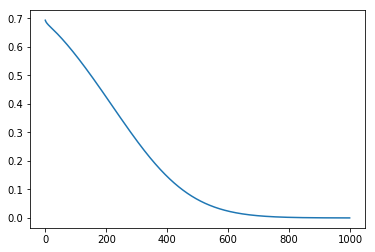

In [14]:
plt.plot(loss)

## Training 2 to be in context of 3

In [15]:
arr_1 = np.zeros((1,1))
arr_2 = np.zeros((1,1))
arr_3 = np.random.randint(low=5,high=100, size=(1,10))
out = np.zeros((1,11))
out[0,0] = 1

arr_1[0,0] = 2
arr_2[0,0] = 3

In [16]:
loss = []
for i in range(1000):
    loss.append(model.train_on_batch(x=[arr_1,arr_2,arr_3],y=out))

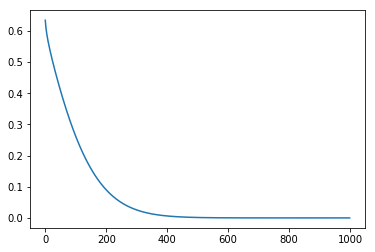

In [17]:
plt.plot(loss)

## Training 4 to be in context of 3

In [18]:
arr_1 = np.zeros((1,1))
arr_2 = np.zeros((1,1))
arr_3 = np.random.randint(low=5,high=100, size=(1,10))
out = np.zeros((1,11))
out[0,0] = 1

arr_1[0,0] = 4
arr_2[0,0] = 3

In [19]:
loss = []
for i in range(1000):
    loss.append(model.train_on_batch(x=[arr_1,arr_2,arr_3],y=out))

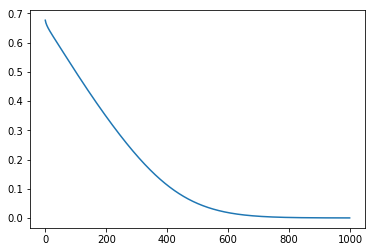

In [20]:
plt.plot(loss)

## Test most similars

In [21]:
def most_similar(n=0):
    
    primary = model.layers[3].get_weights()[0][n]
    ids = list()
    sim = list()
    for i in range(model.layers[3].get_weights()[0].shape[0]):
        if(i!=n):
            secondary = model.layers[3].get_weights()[0][i]
            sim.append(1 - spatial.distance.cosine(primary, secondary))
            ids.append(str(i))
    
    return pd.DataFrame({'Id': ids, 'Similarity': sim}).sort_values('Similarity', ascending=False).head(10).values

In [22]:
print(most_similar(2))

[['0' 0.9998466968536377]
 ['4' 0.9993940591812134]
 ['28' 0.7139049172401428]
 ['95' 0.6732168197631836]
 ['54' 0.6595069169998169]
 ['56' 0.6379315853118896]
 ['32' 0.6148781776428223]
 ['44' 0.5391502380371094]
 ['33' 0.5160682797431946]
 ['63' 0.5106841921806335]]
